In [51]:
import numpy as np
from collections import Counter

In [63]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum( (x1-x2)**2 ))

In [65]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # 거리 계산하기
        dists = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # 가까운 k 구하기
        k_indicies = np.argsort(dists)[:self.k]
        kn_labels = [self.y_train[i] for i in k_indicies]

        # 확률이 높은 클래스 찾기
        return Counter(kn_labels).most_common()[0][0]
        

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [13]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [47]:
print(X[0,2])
print(X[0,3])
print(iris.feature_names)

1.4
0.2
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=1234
)

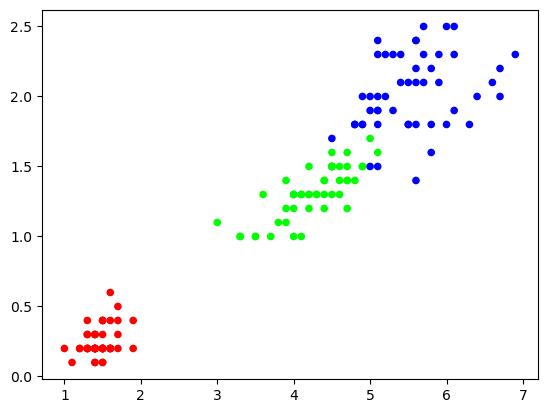

In [27]:
plt.figure()
plt.scatter(
    X[:,2], X[:,3],
    c=y,
    cmap=cmap,
    s=20
)
plt.show()

In [67]:
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(predictions)

[1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]


In [81]:
# 정확도 계산
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

# 끝

0.9666666666666667
